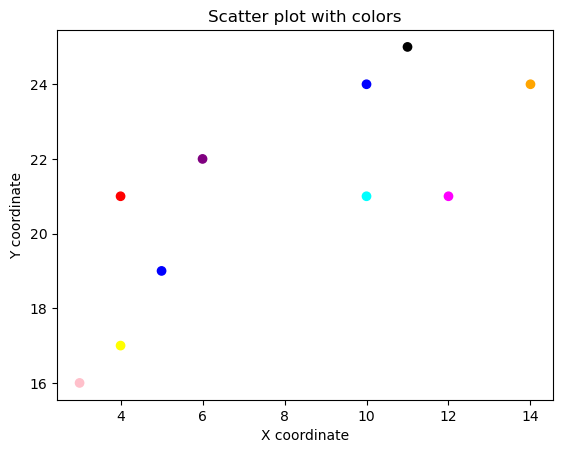

In [2]:
#Bài 1
import numpy as np
import matplotlib.pyplot as plt

# Tọa độ các điểm
data = np.array([
    [4, 21], [5, 19], [10, 24], [4, 17], [3, 16], 
    [11, 25], [14, 24], [6, 22], [10, 21], [12, 21]
])

# Màu sắc của các điểm
colors = np.array(["red", "blue", "blue", "yellow", "pink", 
                   "black", "orange", "purple", "cyan", "magenta"])

# Hiển thị các điểm lên đồ thị
plt.scatter(data[:, 0], data[:, 1], c=colors)
plt.title('Scatter plot with colors')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

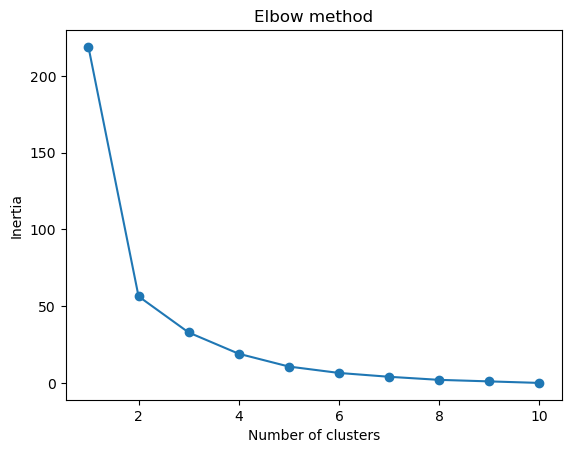

In [3]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


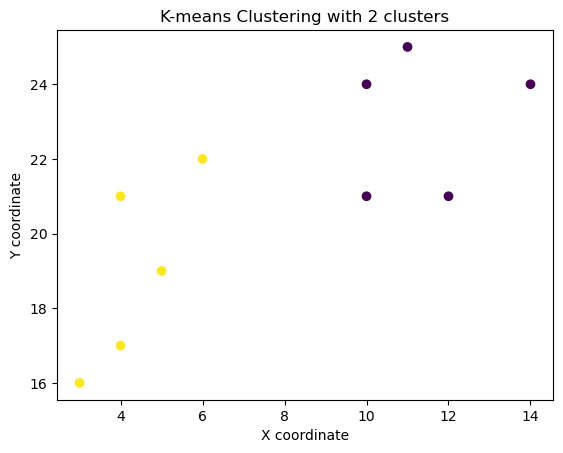

Centers found by scikit-learn:
[[11.4 23. ]
 [ 4.4 19. ]]


In [4]:
# Chọn số phân cụm là 2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)

# Hiển thị kết quả phân cụm với màu sắc khác nhau cho mỗi cụm
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering with 2 clusters')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

# Tính các center point của từng cụm
centers = kmeans.cluster_centers_

print('Centers found by scikit-learn:')
print(centers)

In [5]:
#Bài 2
import pandas as pd

# Đọc dữ liệu vào DataFrame
df = pd.read_csv('housing.csv')

In [6]:
# Hiển thị DataFrame
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [7]:
# Hiển thị tên các cột
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [8]:
# Hiển thị số lượng records
print(len(df))

20640


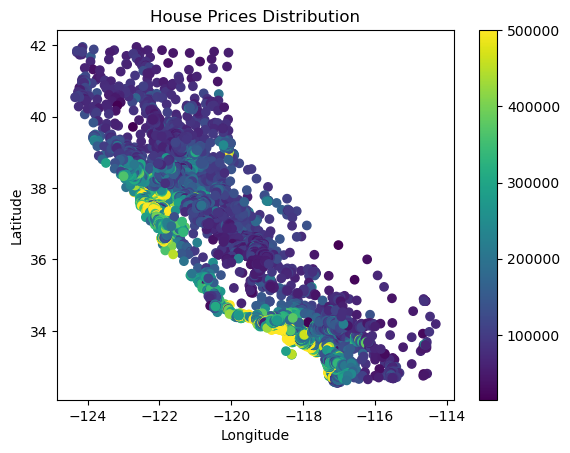

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy dữ liệu
x = df['longitude'].to_numpy()
y = df['latitude'].to_numpy()
color = df['median_house_value'].to_numpy()

# Hiển thị biểu đồ
plt.scatter(x, y, c=color)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices Distribution')
plt.show()

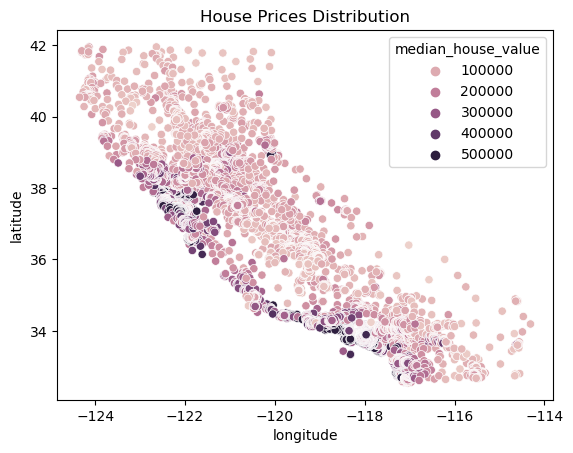

In [10]:
import seaborn as sns

# Hiển thị biểu đồ
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value')
plt.title('House Prices Distribution')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X = df[['latitude', 'longitude']]
y = df[['median_house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(df.shape)

(14448, 2)
(6192, 2)
(20640, 10)


In [12]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

print(X_train_norm.shape)
print(X_test_norm.shape)

(14448, 2)
(6192, 2)


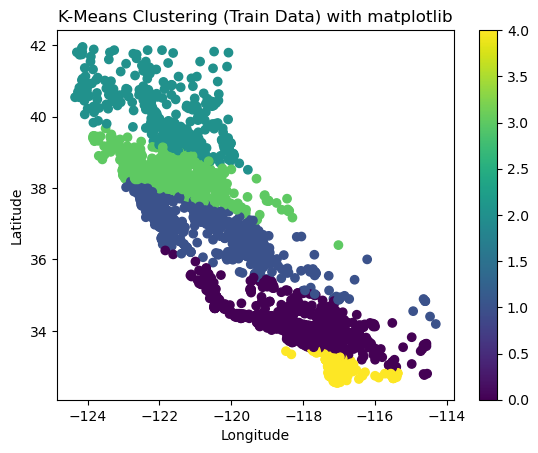

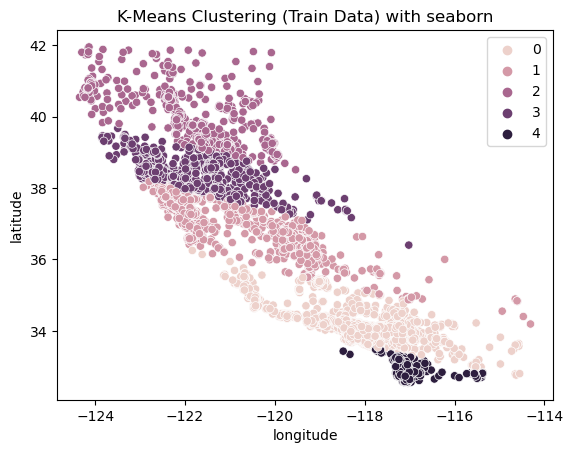

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)

# Matplotlib
plt.scatter(X_train['longitude'].to_numpy(), X_train['latitude'].to_numpy(), c=kmeans.labels_)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering (Train Data) with matplotlib')
plt.show()

# Seaborn
sns.scatterplot(data=X_train, x='longitude', y='latitude', hue=kmeans.labels_)
plt.title('K-Means Clustering (Train Data) with seaborn')
plt.show()

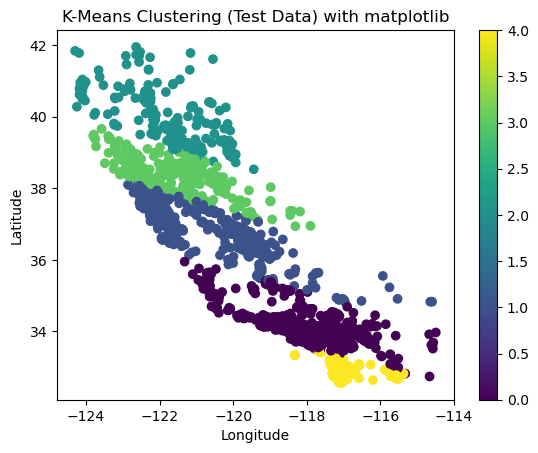

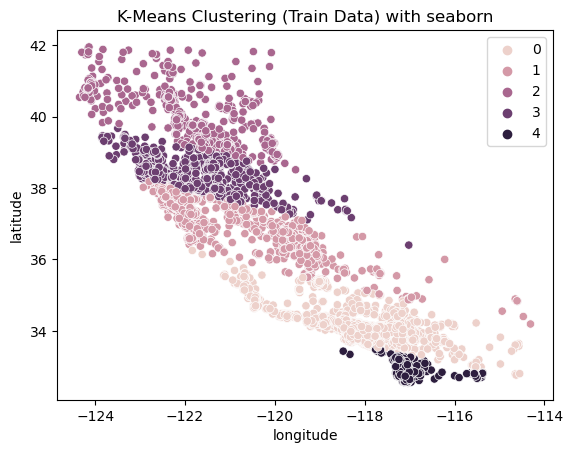

In [15]:
y_pred = kmeans.predict(X_test_norm)
# Matplotlib
plt.scatter(X_test['longitude'].to_numpy(), X_test['latitude'].to_numpy(), c=y_pred)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering (Test Data) with matplotlib')
plt.show()

# Seaborn
sns.scatterplot(data=X_train, x='longitude', y='latitude', hue=kmeans.labels_)
plt.title('K-Means Clustering (Train Data) with seaborn')
plt.show()


In [ ]:
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)

Centers found by scikit-learn:
[[ 0.27698887 -0.96087076]
 [ 0.29345769 -0.95596888]
 [ 0.31133094 -0.95029171]
 [ 0.30047293 -0.95378665]
 [ 0.27026045 -0.96278599]]


In [ ]:
#Bài 3
import pandas as pd

# Đọc dữ liệu vào DataFrame
df = pd.read_csv('housing.csv')

In [ ]:
# Hiển thị DataFrame
print(df)

# Hiển thị tên các cột
print(df.columns)

# Hiển thị số lượng records
print(len(df))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

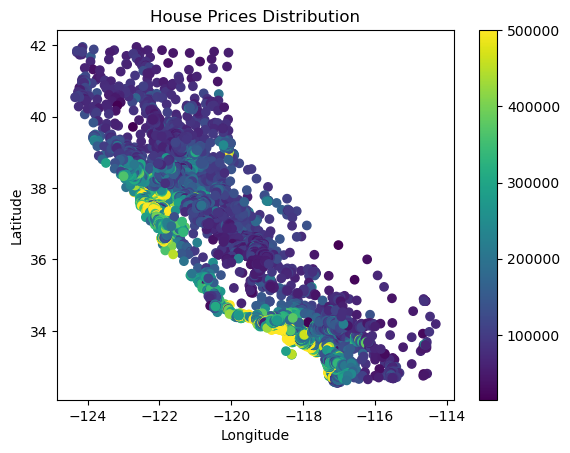

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy dữ liệu
x = df['longitude'].to_numpy()
y = df['latitude'].to_numpy()
color = df['median_house_value'].to_numpy()

# Hiển thị biểu đồ
plt.scatter(x, y, c=color)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices Distribution')
plt.show()

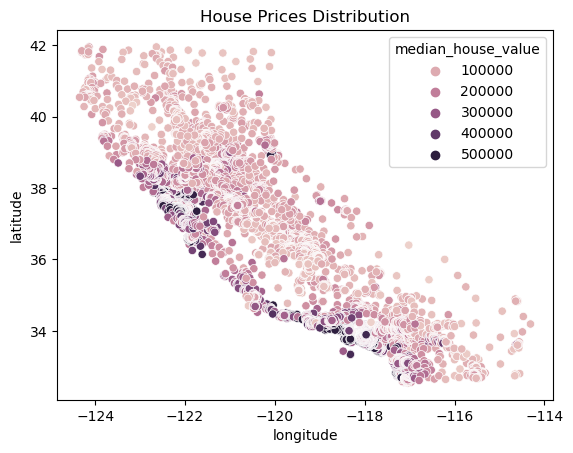

In [ ]:
import seaborn as sns

# Hiển thị biểu đồ
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value')
plt.title('House Prices Distribution')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['latitude', 'longitude']]
y = df[['median_house_value']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(df.shape)

(16512, 2)
(4128, 2)
(20640, 10)


In [ ]:
from sklearn import preprocessing

# Tiền xử lý dữ liệu
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

print(X_train_norm.shape)
print(X_test_norm.shape)

(16512, 2)
(4128, 2)


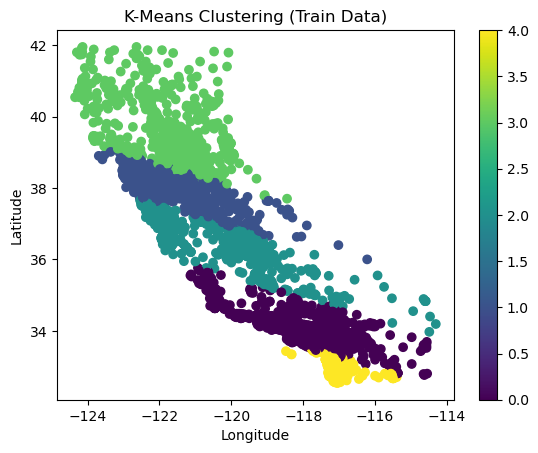

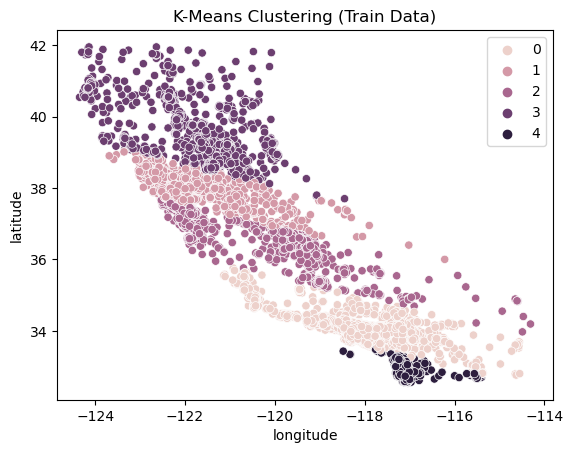

In [ ]:
from sklearn.cluster import KMeans

# Huấn luyện mô hình K-Means
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)

# Matplotlib
import matplotlib.pyplot as plt

# Hiển thị kết quả huấn luyện
plt.scatter(X_train['longitude'].to_numpy(), X_train['latitude'].to_numpy(), c=kmeans.labels_)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering (Train Data) with matplotlib')
plt.show()

# Seaborn
import seaborn as sns

# Hiển thị kết quả huấn luyện
sns.scatterplot(data=X_train, x='longitude', y='latitude', hue=kmeans.labels_)
plt.title('K-Means Clustering (Train Data) with seaborn')
plt.show()

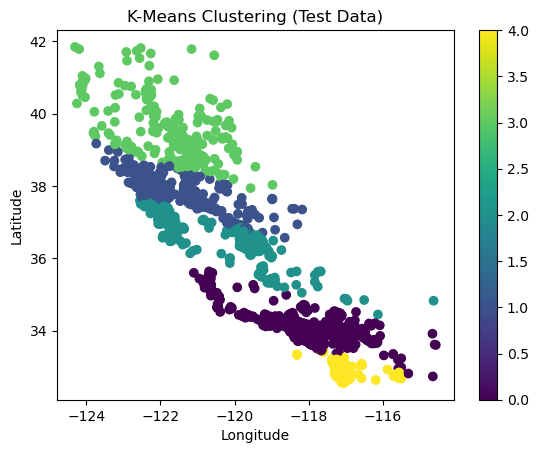

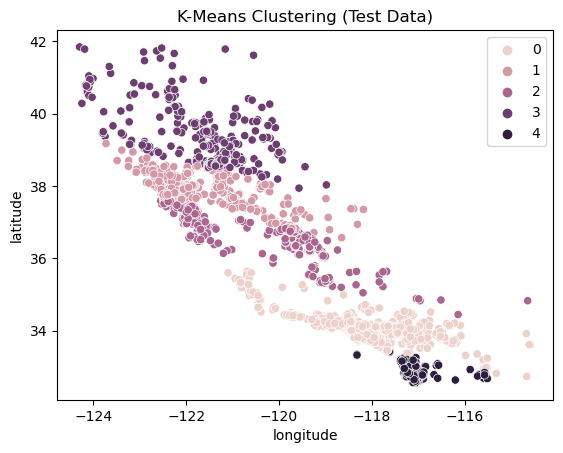

In [ ]:
y_pred = kmeans.predict(X_test_norm)

# Matplotlib
# Hiển thị kết quả kiểm thử
plt.scatter(X_test['longitude'].to_numpy(), X_test['latitude'].to_numpy(), c=y_pred)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering (Test Data) with matplotlib')
plt.show()

# Seaborn
# Hiển thị kết quả kiểm thử
sns.scatterplot(data=X_test, x='longitude', y='latitude', hue=y_pred)
plt.title('K-Means Clustering (Test Data) with seaborn')
plt.show()

In [ ]:
# Xuất giá trị trung tâm
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)

Centers found by scikit-learn:
[[ 0.27676085 -0.96093733]
 [ 0.29670189 -0.9549679 ]
 [ 0.29116278 -0.95666917]
 [ 0.30732904 -0.95158891]
 [ 0.2701793  -0.96280889]]
